In [1]:
# TODO: consider splitting script into a module

import os
import pandas as pd
import xarray as xr
import datetime

def read_H8_MODIS_byDate(date, modis_res, modis_sat, data_path):
    '''
    TODO: comments
    '''
    
    H8_PARENT_DIR = 'H8_MODIS_2019-2020'
    H8_MODIS_DIR = f'H8_{modis_sat}_{modis_res}'
    H8_MODIS_FILENAME = f'H8_{modis_sat}_{modis_res}_Aus_0.05_{date}.nc'
    H8_MODIS_PATH = os.path.join(data_path, H8_PARENT_DIR, H8_MODIS_DIR, H8_MODIS_FILENAME)
    
    df = xr.open_dataset(H8_MODIS_PATH).to_dataframe()
    df = df.drop(columns=['solar_azimuth_angle','solar_zenith_angle'])
    
    return df

def read_MODIS_byDate(date, modis_res, modis_sat, data_path):
    '''
    TODO: comments
    '''
    
    MODIS_PARENT_DIR = 'MODIS_L2_Aus_2019-2020'
    MODIS_FILENAME = f'{modis_sat}_{modis_res}_Aus_0.05_{date}.nc'
    MODIS_PATH = os.path.join(data_path, MODIS_PARENT_DIR, MODIS_FILENAME)
    
    df = xr.open_dataset(MODIS_PATH).drop_dims(['corner','file']).to_dataframe()
    
    return df

def concat_rows(df_list):
    '''
    TODO: comments
    '''
    
    for i in range(1,len(df_list)):
        if list(df_list[i].columns) != list(df_list[0].columns) and (not df_list[0].empty and not df_list[i].empty):
            raise Exception('ERROR: Columns do not line up in the dataframes that are to be concatenated. Data may need to be fixed before proceeding.')
            
    return pd.concat(df_list, axis=0)

def check_lat_lon(df_H8, df_MODIS):
    '''
    TODO: comments
    '''
    
    if list(df_H8.lat) != list(df_MODIS.Latitude) or list(df_H8.lon) != list(df_MODIS.Longitude):
        raise Exception('ERROR: Lat/Lon rows do not line up between the two dataframes.')

def load_data_byDate(date_str, modis_res, data_dir):
    '''
    TODO: comments
    '''
    
    df_H8_MOD04 = read_H8_MODIS_byDate(date_str, modis_res, 'MOD04', data_dir)
    df_H8_MYD04 = read_H8_MODIS_byDate(date_str, modis_res, 'MYD04', data_dir)
    df_H8 = concat_rows([df_H8_MOD04, df_H8_MYD04])
    
    df_MOD04 = read_MODIS_byDate(date_str, modis_res, 'MOD04', data_dir)
    df_MYD04 = read_MODIS_byDate(date_str, modis_res, 'MYD04', data_dir)
    df_MODIS = concat_rows([df_MOD04, df_MYD04])
    
    check_lat_lon(df_H8, df_MODIS)
    
    return df_H8, df_MODIS

def generate_dates(years, days):
    '''
    TODO: comments
    '''
    
    for year in years:
        for month in range(1, 13):
            for day in days:
                yield datetime.date(year, month, day).strftime("%Y-%m-%d")

def load_data(dates_str, modis_res, data_dir):
    '''
    TODO: comments
    '''
    
    df_H8 = pd.DataFrame()
    df_MODIS = pd.DataFrame()
    
    for date_str in dates_str:
                
        df_H8_daily, df_MODIS_daily = load_data_byDate(date_str, modis_res, data_dir)

        df_H8 = concat_rows([df_H8, df_H8_daily])
        df_MODIS = concat_rows([df_MODIS, df_MODIS_daily])
                
    return df_H8, df_MODIS

In [2]:
PARAM_DATA_YEARS = [2019]
PARAM_TRAIN_DAYSOFMONTH = [1,10,20]
PARAM_VAL_DAYSOFMONTH = [8,16]
PARAM_HOLDOUT_DAYSOFMONTH = [28]
PARAM_MODIS_RES = 'L2'
PARAM_DATA_DIR = '/Users/sunfuhan/Desktop/capstone/code_s2'  # change this to the directory path where your H8 and MODIS files are located

df_H8_train, df_MODIS_train = load_data(generate_dates(PARAM_DATA_YEARS, PARAM_TRAIN_DAYSOFMONTH), 
                                        PARAM_MODIS_RES, 
                                        PARAM_DATA_DIR)

df_H8_val, df_MODIS_val = load_data(generate_dates(PARAM_DATA_YEARS, PARAM_VAL_DAYSOFMONTH), 
                                    PARAM_MODIS_RES, 
                                    PARAM_DATA_DIR)

df_H8_holdout, df_MODIS_holdout = load_data(generate_dates(PARAM_DATA_YEARS, PARAM_HOLDOUT_DAYSOFMONTH), 
                                    PARAM_MODIS_RES, 
                                    PARAM_DATA_DIR)

In [3]:
df_H8_train

,lat,lon,time,channel_0001_brf,channel_0001_scaled_radiance,channel_0002_brf,channel_0002_scaled_radiance,channel_0003_brf,channel_0003_scaled_radiance,channel_0004_brf,...,channel_0007_brightness_temperature,channel_0008_brightness_temperature,channel_0009_brightness_temperature,channel_0010_brightness_temperature,channel_0011_brightness_temperature,channel_0012_brightness_temperature,channel_0013_brightness_temperature,channel_0014_brightness_temperature,channel_0015_brightness_temperature,channel_0016_brightness_temperature
sounding,,,,,,,,,,,,,,,,,,,,,
0,-14.753107,131.765823,2019-01-01 01:20:00,0.130859,0.120117,0.115234,0.105469,0.112305,0.103516,0.293945,...,310.2500,235.7500,245.9375,257.2500,297.9375,278.1875,300.3125,297.9375,291.9375,276.4375
1,-16.210176,141.704361,2019-01-01 01:20:00,0.133789,0.131836,0.115234,0.113281,0.126953,0.125000,0.218750,...,308.7500,236.6875,245.8125,256.5625,294.9375,276.7500,297.0000,294.3125,288.1250,273.9375
2,-16.236547,141.939377,2019-01-01 01:20:00,0.141602,0.139648,0.127930,0.125977,0.127930,0.126953,0.214844,...,312.1250,237.6250,246.3125,256.6875,294.1250,276.5625,296.3125,293.4375,287.1875,273.5000
3,-16.299374,141.688354,2019-01-01 01:20:00,0.120117,0.119141,0.105469,0.104492,0.103516,0.102539,0.224609,...,312.1250,237.0000,245.9375,256.6875,298.1250,279.7500,300.4375,297.6250,290.8750,275.6875
4,-16.325727,141.923538,2019-01-01 01:20:00,0.125977,0.124023,0.112305,0.110352,0.109375,0.108398,0.240234,...,315.2500,237.7500,246.5625,256.9375,298.8750,280.3125,301.2500,298.0000,290.8750,275.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13838,-20.037235,120.381042,2019-12-20 06:30:00,0.117188,0.097656,0.109375,0.086914,0.210938,0.169922,0.328125,...,326.1250,245.1875,251.4375,257.6875,304.7500,282.3750,313.5000,310.8125,301.8125,279.9375
13839,-20.126986,119.957207,2019-12-20 06:30:00,0.109375,0.090820,0.101562,0.080078,0.195312,0.159180,0.281250,...,327.9375,244.8125,251.1250,257.7500,306.0625,283.1875,314.8125,311.9375,302.5000,279.9375
13840,-20.209593,119.562309,2019-12-20 06:30:00,0.101562,0.086914,0.093750,0.076172,0.148438,0.125000,0.242188,...,325.7500,244.5625,251.2500,257.6250,306.1250,282.3750,313.0625,310.3750,301.1250,279.3125


In [4]:
df_MODIS_train

,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Land_sea_Flag,Aerosol_Type_Land,Longitude,Latitude,time,i_file,AOD_550_Dark_Target_Deep_Blue_Combined
sounding,,,,,,,,,,,
0,27.980000,111.509995,26.580000,99.159996,1.0,2.0,131.765823,-14.753107,2019-01-01 01:20:00,0.0,0.155
1,18.570000,114.449997,52.149998,-83.339996,1.0,2.0,141.704361,-16.210176,2019-01-01 01:20:00,0.0,0.002
2,18.359999,114.589996,53.189999,-83.409996,1.0,2.0,141.939377,-16.236547,2019-01-01 01:20:00,0.0,-0.050
3,18.539999,114.199997,52.160000,-83.339996,1.0,2.0,141.688354,-16.299374,2019-01-01 01:20:00,0.0,-0.016
4,18.330000,114.339996,53.199997,-83.409996,1.0,2.0,141.923538,-16.325727,2019-01-01 01:20:00,0.0,-0.050
...,...,...,...,...,...,...,...,...,...,...,...
13838,36.049999,-102.579994,64.939995,-102.680000,1.0,NaN,120.381042,-20.037235,2019-12-20 06:30:00,12.0,0.083
13839,35.649998,-102.430000,63.719997,-102.529999,1.0,NaN,119.957207,-20.126986,2019-12-20 06:30:00,12.0,0.080
13840,35.270000,-102.299995,62.529999,-102.389999,1.0,NaN,119.562309,-20.209593,2019-12-20 06:30:00,12.0,0.105


In [5]:
feature_cols = [
    # 'channel_0001_brf',
    'lat',
    'lon',
    'channel_0001_scaled_radiance',
    # 'channel_0002_brf',
    'channel_0002_scaled_radiance',
    # 'channel_0003_brf',
    'channel_0003_scaled_radiance',
    # 'channel_0004_brf',
    'channel_0004_scaled_radiance',
    # 'channel_0005_brf',
    'channel_0005_scaled_radiance',
    # 'channel_0006_brf',
    'channel_0006_scaled_radiance',
    'channel_0007_brightness_temperature',
    'channel_0008_brightness_temperature',
    'channel_0009_brightness_temperature',
    'channel_0010_brightness_temperature',
    'channel_0011_brightness_temperature',
    'channel_0012_brightness_temperature',
    'channel_0013_brightness_temperature',
    'channel_0014_brightness_temperature',
    'channel_0015_brightness_temperature',
    'channel_0016_brightness_temperature',
]

response_col = 'AOD_550_Dark_Target_Deep_Blue_Combined'

X_train = df_H8_train[feature_cols]
y_train = df_MODIS_train[response_col]
X_val = df_H8_val[feature_cols]
y_val = df_MODIS_val[response_col]
X_holdout = df_H8_holdout[feature_cols]
y_holdout = df_MODIS_holdout[response_col]

In [6]:
train = pd.concat([X_train, y_train],axis=1)
val =  pd.concat([X_val, y_val],axis=1)
holdout = pd.concat([X_holdout, y_holdout],axis=1)
train = train.dropna()
val = val.dropna()
holdout = holdout.dropna()
train

,lat,lon,channel_0001_scaled_radiance,channel_0002_scaled_radiance,channel_0003_scaled_radiance,channel_0004_scaled_radiance,channel_0005_scaled_radiance,channel_0006_scaled_radiance,channel_0007_brightness_temperature,channel_0008_brightness_temperature,channel_0009_brightness_temperature,channel_0010_brightness_temperature,channel_0011_brightness_temperature,channel_0012_brightness_temperature,channel_0013_brightness_temperature,channel_0014_brightness_temperature,channel_0015_brightness_temperature,channel_0016_brightness_temperature,AOD_550_Dark_Target_Deep_Blue_Combined
sounding,,,,,,,,,,,,,,,,,,,
0,-14.753107,131.765823,0.120117,0.105469,0.103516,0.270508,0.250000,0.109375,310.2500,235.7500,245.9375,257.2500,297.9375,278.1875,300.3125,297.9375,291.9375,276.4375,0.155
1,-16.210176,141.704361,0.131836,0.113281,0.125000,0.214844,0.210938,0.109375,308.7500,236.6875,245.8125,256.5625,294.9375,276.7500,297.0000,294.3125,288.1250,273.9375,0.002
2,-16.236547,141.939377,0.139648,0.125977,0.126953,0.211914,0.304688,0.179688,312.1250,237.6250,246.3125,256.6875,294.1250,276.5625,296.3125,293.4375,287.1875,273.5000,-0.050
3,-16.299374,141.688354,0.119141,0.104492,0.102539,0.220703,0.281250,0.140625,312.1250,237.0000,245.9375,256.6875,298.1250,279.7500,300.4375,297.6250,290.8750,275.6875,-0.016
4,-16.325727,141.923538,0.124023,0.110352,0.108398,0.237305,0.296875,0.179688,315.2500,237.7500,246.5625,256.9375,298.8750,280.3125,301.2500,298.0000,290.8750,275.5000,-0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13838,-20.037235,120.381042,0.097656,0.086914,0.169922,0.266602,0.346680,0.256836,326.1250,245.1875,251.4375,257.6875,304.7500,282.3750,313.5000,310.8125,301.8125,279.9375,0.083
13839,-20.126986,119.957207,0.090820,0.080078,0.159180,0.233398,0.333984,0.258789,327.9375,244.8125,251.1250,257.7500,306.0625,283.1875,314.8125,311.9375,302.5000,279.9375,0.080
13840,-20.209593,119.562309,0.086914,0.076172,0.125000,0.199219,0.281250,0.213867,325.7500,244.5625,251.2500,257.6250,306.1250,282.3750,313.0625,310.3750,301.1250,279.3125,0.105


In [7]:
feature = [
    # 'channel_0001_brf',
    'channel_0001_scaled_radiance',
    # 'channel_0002_brf',
    'channel_0002_scaled_radiance',
    # 'channel_0003_brf',
    'channel_0003_scaled_radiance',
    # 'channel_0004_brf',
    'channel_0004_scaled_radiance',
    # 'channel_0005_brf',
    'channel_0005_scaled_radiance',
    # 'channel_0006_brf',
    'channel_0006_scaled_radiance',
    'channel_0007_brightness_temperature',
    'channel_0008_brightness_temperature',
    'channel_0009_brightness_temperature',
    'channel_0010_brightness_temperature',
    'channel_0011_brightness_temperature',
    'channel_0012_brightness_temperature',
    'channel_0013_brightness_temperature',
    'channel_0014_brightness_temperature',
    'channel_0015_brightness_temperature',
    'channel_0016_brightness_temperature',
]
X_train = train[feature]
y_train = train[response_col]
X_val = val[feature]
y_val = val[response_col]
X_holdout = holdout[feature]
y_holdout = holdout[response_col]

In [8]:
X_train

,channel_0001_scaled_radiance,channel_0002_scaled_radiance,channel_0003_scaled_radiance,channel_0004_scaled_radiance,channel_0005_scaled_radiance,channel_0006_scaled_radiance,channel_0007_brightness_temperature,channel_0008_brightness_temperature,channel_0009_brightness_temperature,channel_0010_brightness_temperature,channel_0011_brightness_temperature,channel_0012_brightness_temperature,channel_0013_brightness_temperature,channel_0014_brightness_temperature,channel_0015_brightness_temperature,channel_0016_brightness_temperature
sounding,,,,,,,,,,,,,,,,
0,0.120117,0.105469,0.103516,0.270508,0.250000,0.109375,310.2500,235.7500,245.9375,257.2500,297.9375,278.1875,300.3125,297.9375,291.9375,276.4375
1,0.131836,0.113281,0.125000,0.214844,0.210938,0.109375,308.7500,236.6875,245.8125,256.5625,294.9375,276.7500,297.0000,294.3125,288.1250,273.9375
2,0.139648,0.125977,0.126953,0.211914,0.304688,0.179688,312.1250,237.6250,246.3125,256.6875,294.1250,276.5625,296.3125,293.4375,287.1875,273.5000
3,0.119141,0.104492,0.102539,0.220703,0.281250,0.140625,312.1250,237.0000,245.9375,256.6875,298.1250,279.7500,300.4375,297.6250,290.8750,275.6875
4,0.124023,0.110352,0.108398,0.237305,0.296875,0.179688,315.2500,237.7500,246.5625,256.9375,298.8750,280.3125,301.2500,298.0000,290.8750,275.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13838,0.097656,0.086914,0.169922,0.266602,0.346680,0.256836,326.1250,245.1875,251.4375,257.6875,304.7500,282.3750,313.5000,310.8125,301.8125,279.9375
13839,0.090820,0.080078,0.159180,0.233398,0.333984,0.258789,327.9375,244.8125,251.1250,257.7500,306.0625,283.1875,314.8125,311.9375,302.5000,279.9375
13840,0.086914,0.076172,0.125000,0.199219,0.281250,0.213867,325.7500,244.5625,251.2500,257.6250,306.1250,282.3750,313.0625,310.3750,301.1250,279.3125


In [9]:
y_train

sounding
0        0.155
1        0.002
2       -0.050
3       -0.016
4       -0.050
         ...  
13838    0.083
13839    0.080
13840    0.105
13841    0.103
13842    0.086
Name: AOD_550_Dark_Target_Deep_Blue_Combined, Length: 1598366, dtype: float32

In [10]:
X_val

,channel_0001_scaled_radiance,channel_0002_scaled_radiance,channel_0003_scaled_radiance,channel_0004_scaled_radiance,channel_0005_scaled_radiance,channel_0006_scaled_radiance,channel_0007_brightness_temperature,channel_0008_brightness_temperature,channel_0009_brightness_temperature,channel_0010_brightness_temperature,channel_0011_brightness_temperature,channel_0012_brightness_temperature,channel_0013_brightness_temperature,channel_0014_brightness_temperature,channel_0015_brightness_temperature,channel_0016_brightness_temperature
sounding,,,,,,,,,,,,,,,,
0,0.091797,0.075195,0.067383,0.258789,0.210938,0.085938,310.0625,243.8125,254.1875,263.1250,299.8750,278.7500,302.4375,300.7500,295.4375,279.3750
1,0.093750,0.080078,0.065430,0.251953,0.203125,0.093750,309.8750,244.3125,254.5625,263.5000,299.9375,279.0000,302.8125,301.2500,296.0000,279.3125
2,0.095703,0.078125,0.059570,0.203125,0.179688,0.070312,309.4375,244.8125,255.3750,263.9375,300.1250,279.1250,302.9375,301.3750,296.0000,279.5000
3,0.096680,0.083008,0.074219,0.234375,0.210938,0.093750,309.5625,244.8125,255.0000,263.8125,299.8750,278.9375,302.7500,301.2500,295.8750,279.5000
4,0.096680,0.081055,0.071289,0.256836,0.210938,0.085938,312.1250,244.6875,254.5000,263.0625,301.0000,280.0000,303.7500,301.9375,295.9375,279.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12722,0.106445,0.100586,0.150391,0.202148,0.241211,0.156250,317.0000,250.6875,260.5000,267.4375,305.8125,278.7500,311.5000,310.8125,305.9375,282.6875
12723,0.083984,0.073242,0.128906,0.193359,0.280273,0.202148,327.0625,251.0000,260.5625,267.1250,312.9375,283.8750,319.7500,319.2500,312.0625,285.9375
12724,0.099609,0.090820,0.166016,0.229492,0.280273,0.189453,324.3750,251.1875,260.8125,267.3125,311.1250,282.2500,316.3125,315.4375,308.3750,284.0625


In [11]:
X_holdout

,channel_0001_scaled_radiance,channel_0002_scaled_radiance,channel_0003_scaled_radiance,channel_0004_scaled_radiance,channel_0005_scaled_radiance,channel_0006_scaled_radiance,channel_0007_brightness_temperature,channel_0008_brightness_temperature,channel_0009_brightness_temperature,channel_0010_brightness_temperature,channel_0011_brightness_temperature,channel_0012_brightness_temperature,channel_0013_brightness_temperature,channel_0014_brightness_temperature,channel_0015_brightness_temperature,channel_0016_brightness_temperature
sounding,,,,,,,,,,,,,,,,
0,0.252930,0.237305,-0.000000,0.233398,0.185547,0.078125,307.5625,237.6250,246.4375,255.6875,295.3750,277.0000,297.2500,294.5625,288.7500,274.2500
1,0.258789,0.247070,0.000977,0.255859,0.149414,0.060547,305.8125,237.6250,246.3125,255.5625,294.3125,276.3125,296.5000,294.1875,288.6875,274.3750
2,0.260742,0.244141,-0.000000,0.251953,0.185547,0.093750,303.6250,232.6875,240.6250,249.0625,286.5000,271.0000,288.3750,284.3125,278.1250,263.7500
3,0.242188,0.225586,0.000977,0.225586,0.136719,0.061523,305.7500,236.6875,245.3750,255.2500,295.6250,277.0000,298.0000,296.0000,289.9375,275.3125
4,0.250000,0.233398,-0.000000,0.236328,0.189453,0.101562,309.8750,236.8750,245.6875,255.5625,297.1250,278.0625,299.5625,297.1875,290.8750,275.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15085,0.089844,0.076172,0.058594,0.195312,0.141602,0.054688,308.7500,243.4375,255.1875,264.0625,298.4375,275.8750,300.6250,298.6250,293.1875,277.4375
15086,0.097656,0.083984,0.071289,0.208008,0.176758,0.087891,309.2500,243.5625,254.9375,263.5000,297.7500,275.4375,299.8750,297.6250,291.9375,276.1875
15087,0.170898,0.157227,0.137695,0.263672,0.209961,0.122070,306.1875,236.3750,246.6250,254.1875,285.4375,267.0625,284.8750,279.9375,273.5625,260.0625


# For GAM

In [12]:
pip install pygam

Note: you may need to restart the kernel to use updated packages.


In [13]:
conda install -c conda-forge pygam

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install flit

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


## 1. build GAM

In [16]:
from pygam.datasets import wage
from pygam import LinearGAM, s, f

In [17]:
gam = LinearGAM().fit(X_train, y_train)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    203.5648
Link Function:                     IdentityLink Log Likelihood:                            -151765787.8085
Number of Samples:                      1598366 AIC:                                        303531984.7466
                                                AICc:                                       303531984.7992
                                                GCV:                                                 0.005
                                                Scale:                                               0.005
                                                Pseudo R-Squared:                                   0.1599
Feature Function                  Lam

/Users/sunfuhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  


In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

predictions_val = gam.predict(X_val)
predictions_holdout = gam.predict(X_holdout)

In [19]:
#accuracy for validation
import math
print("R2 accuracy：\n",r2_score(y_val, predictions_val))
print("MSE：\n",mean_squared_error(y_val, predictions_val))
print("RMSE：\n",math.sqrt(mean_squared_error(y_val, predictions_val)))

R2 accuracy：
 0.1231221760561041
MSE：
 0.004978625430451655
RMSE：
 0.07055937521301939


In [20]:
#accuracy for holdout
print("R2 accuracy：\n",r2_score(y_holdout, predictions_holdout))
print("MSE：\n",mean_squared_error(y_holdout, predictions_holdout))
print("RMSE：\n",math.sqrt(mean_squared_error(y_holdout, predictions_holdout)))

R2 accuracy：
 0.12454099522241613
MSE：
 0.0039275120758433734
RMSE：
 0.06266986577170382


## 2. test parameters by partial dependency plots

## 2.1 test lam


lambda_: 0.01


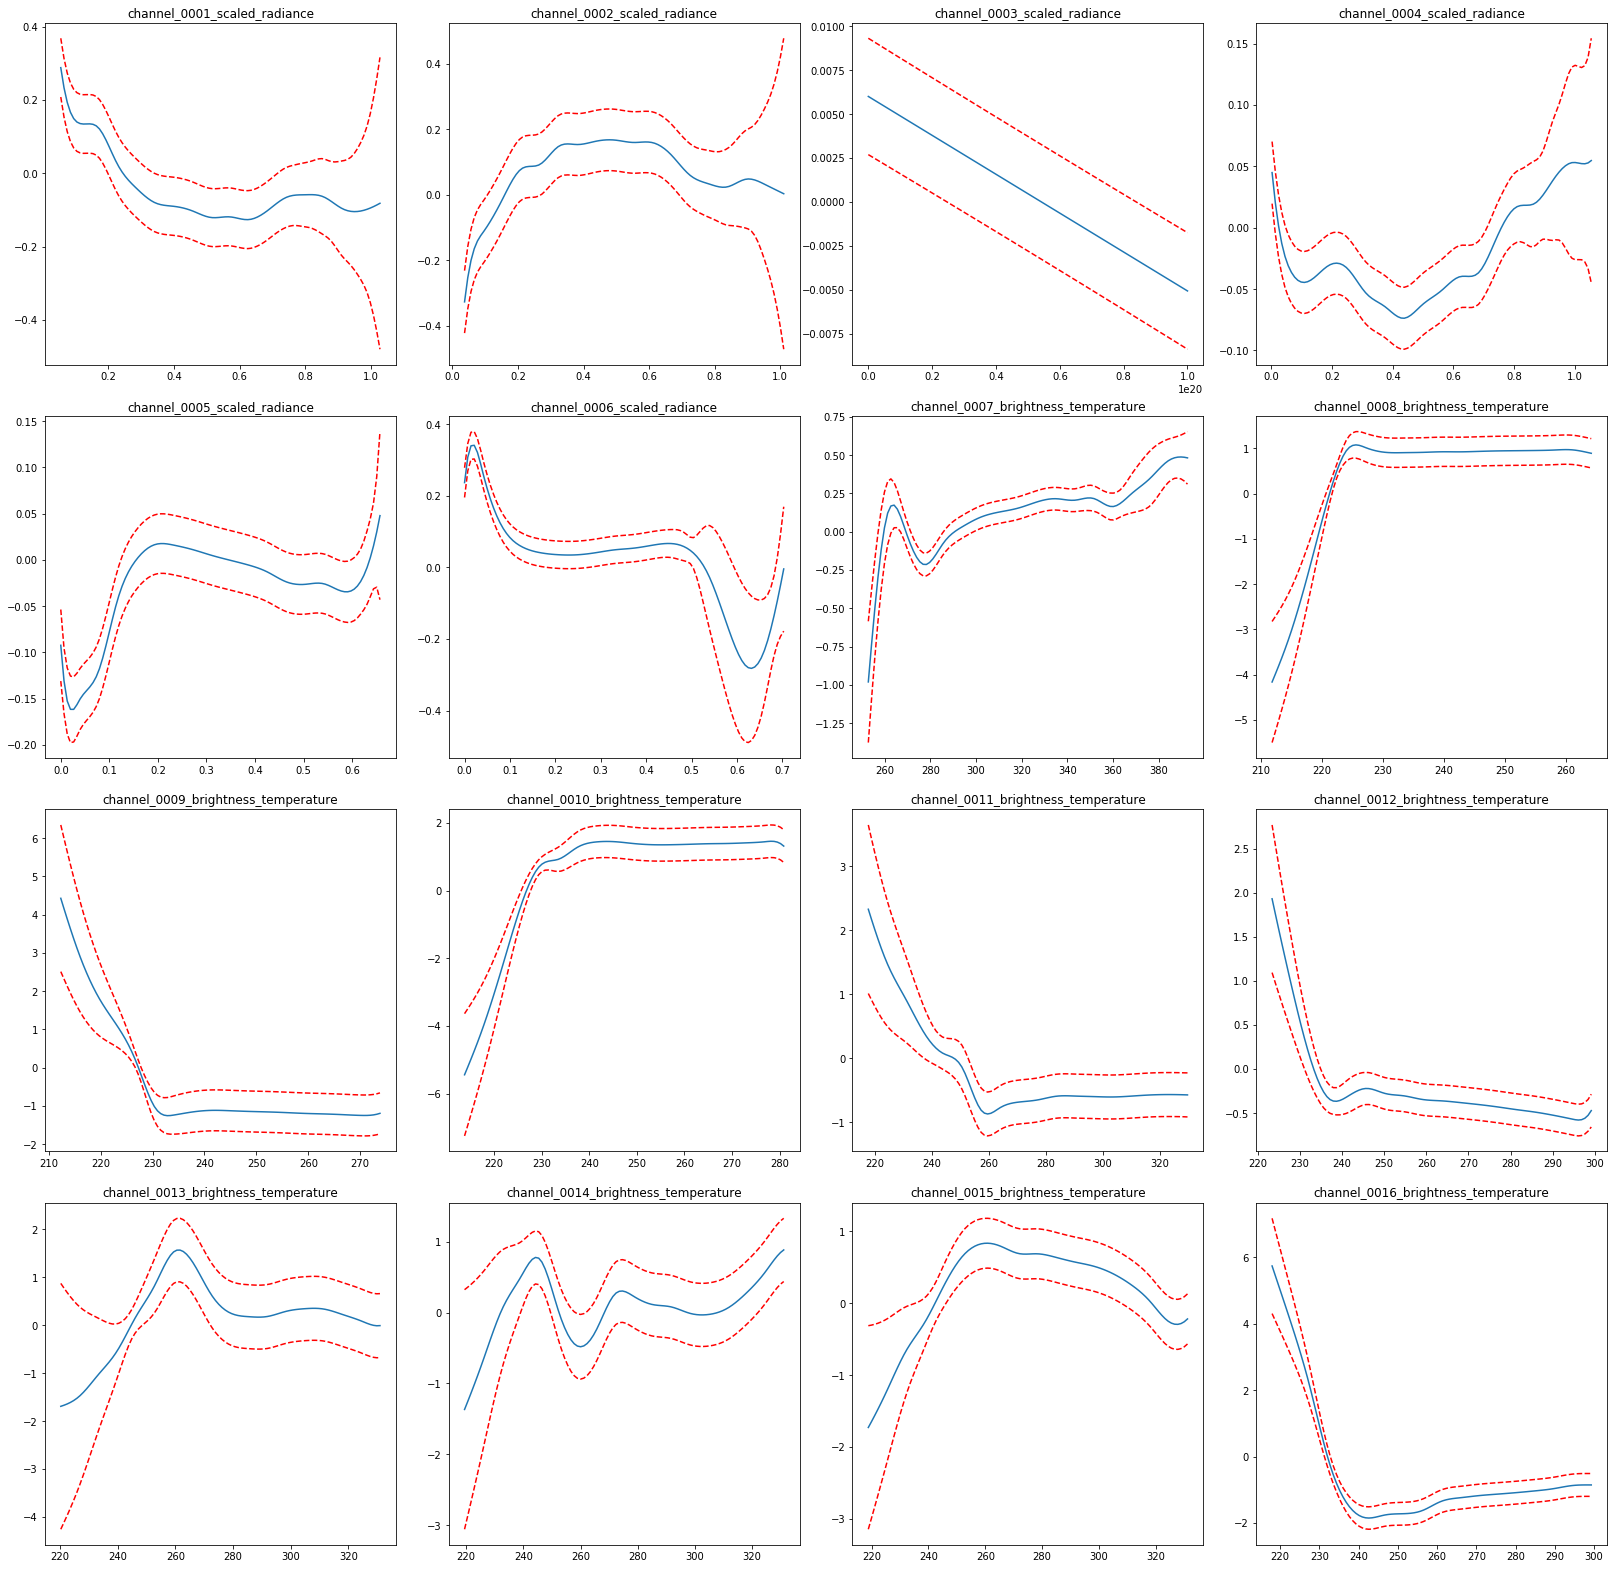


lambda_: 0.1


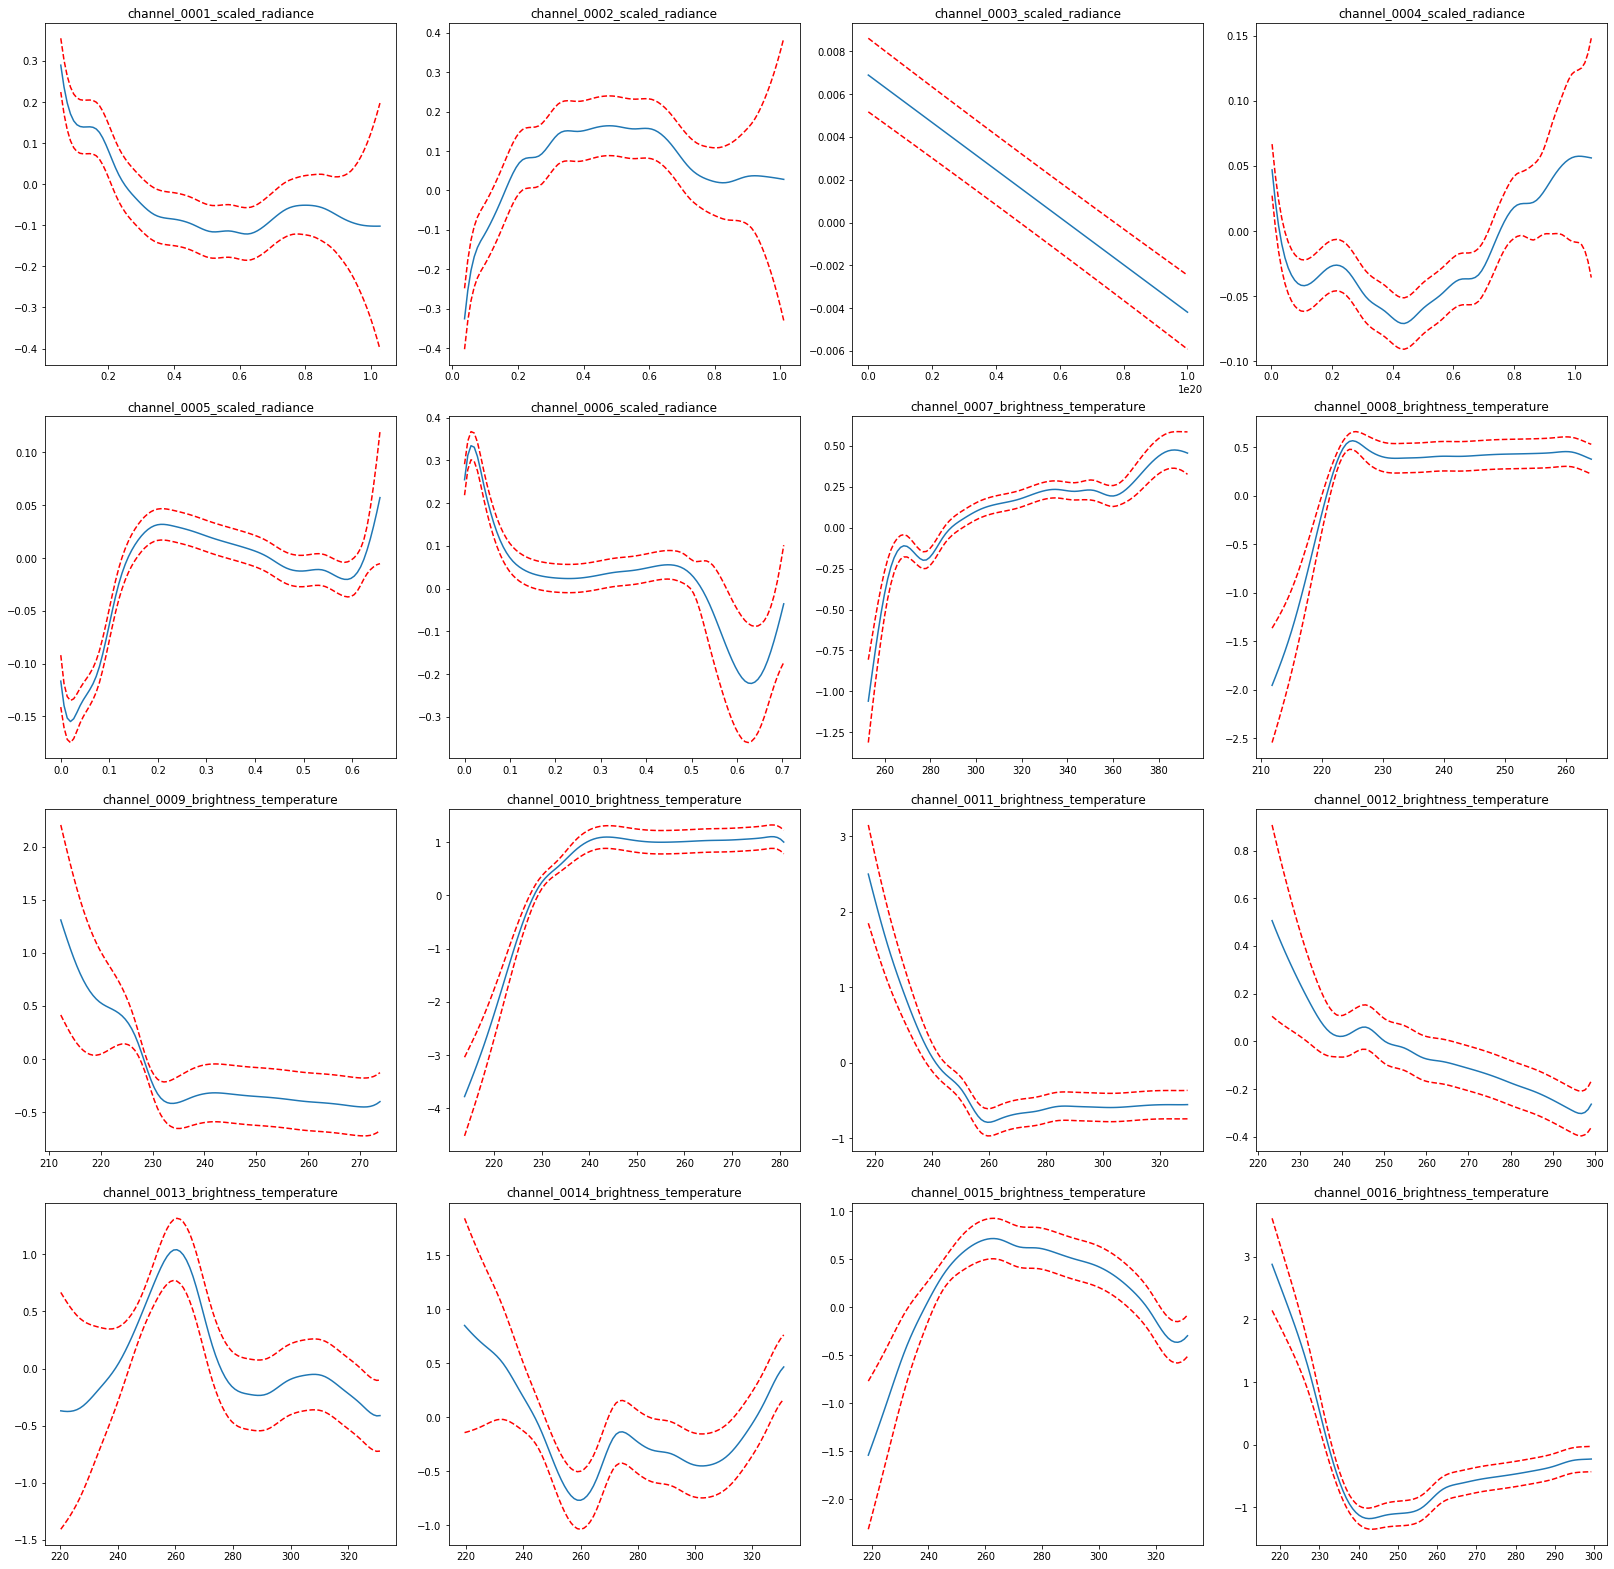


lambda_: 1


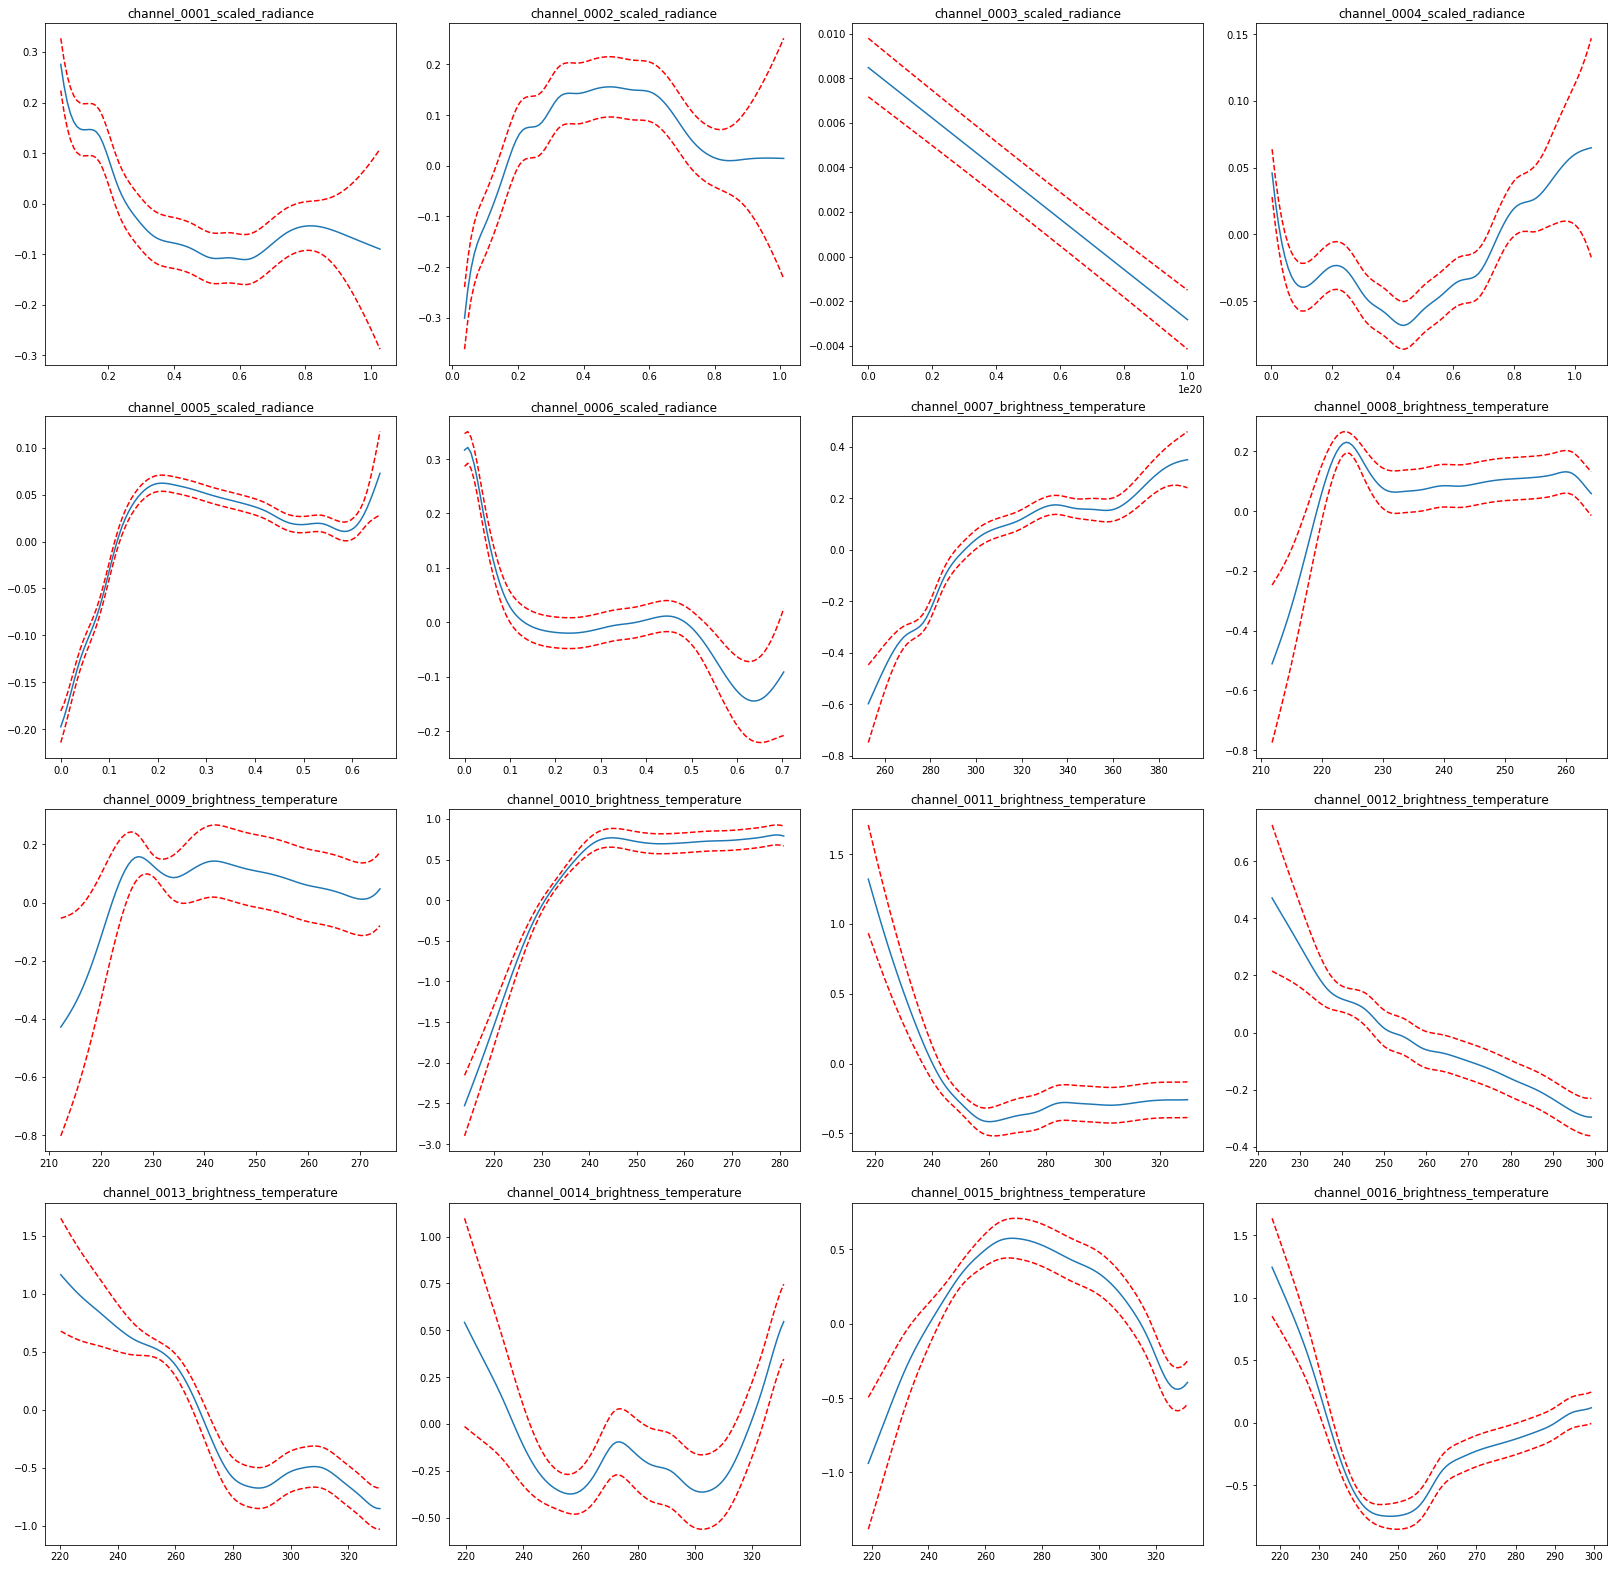


lambda_: 10


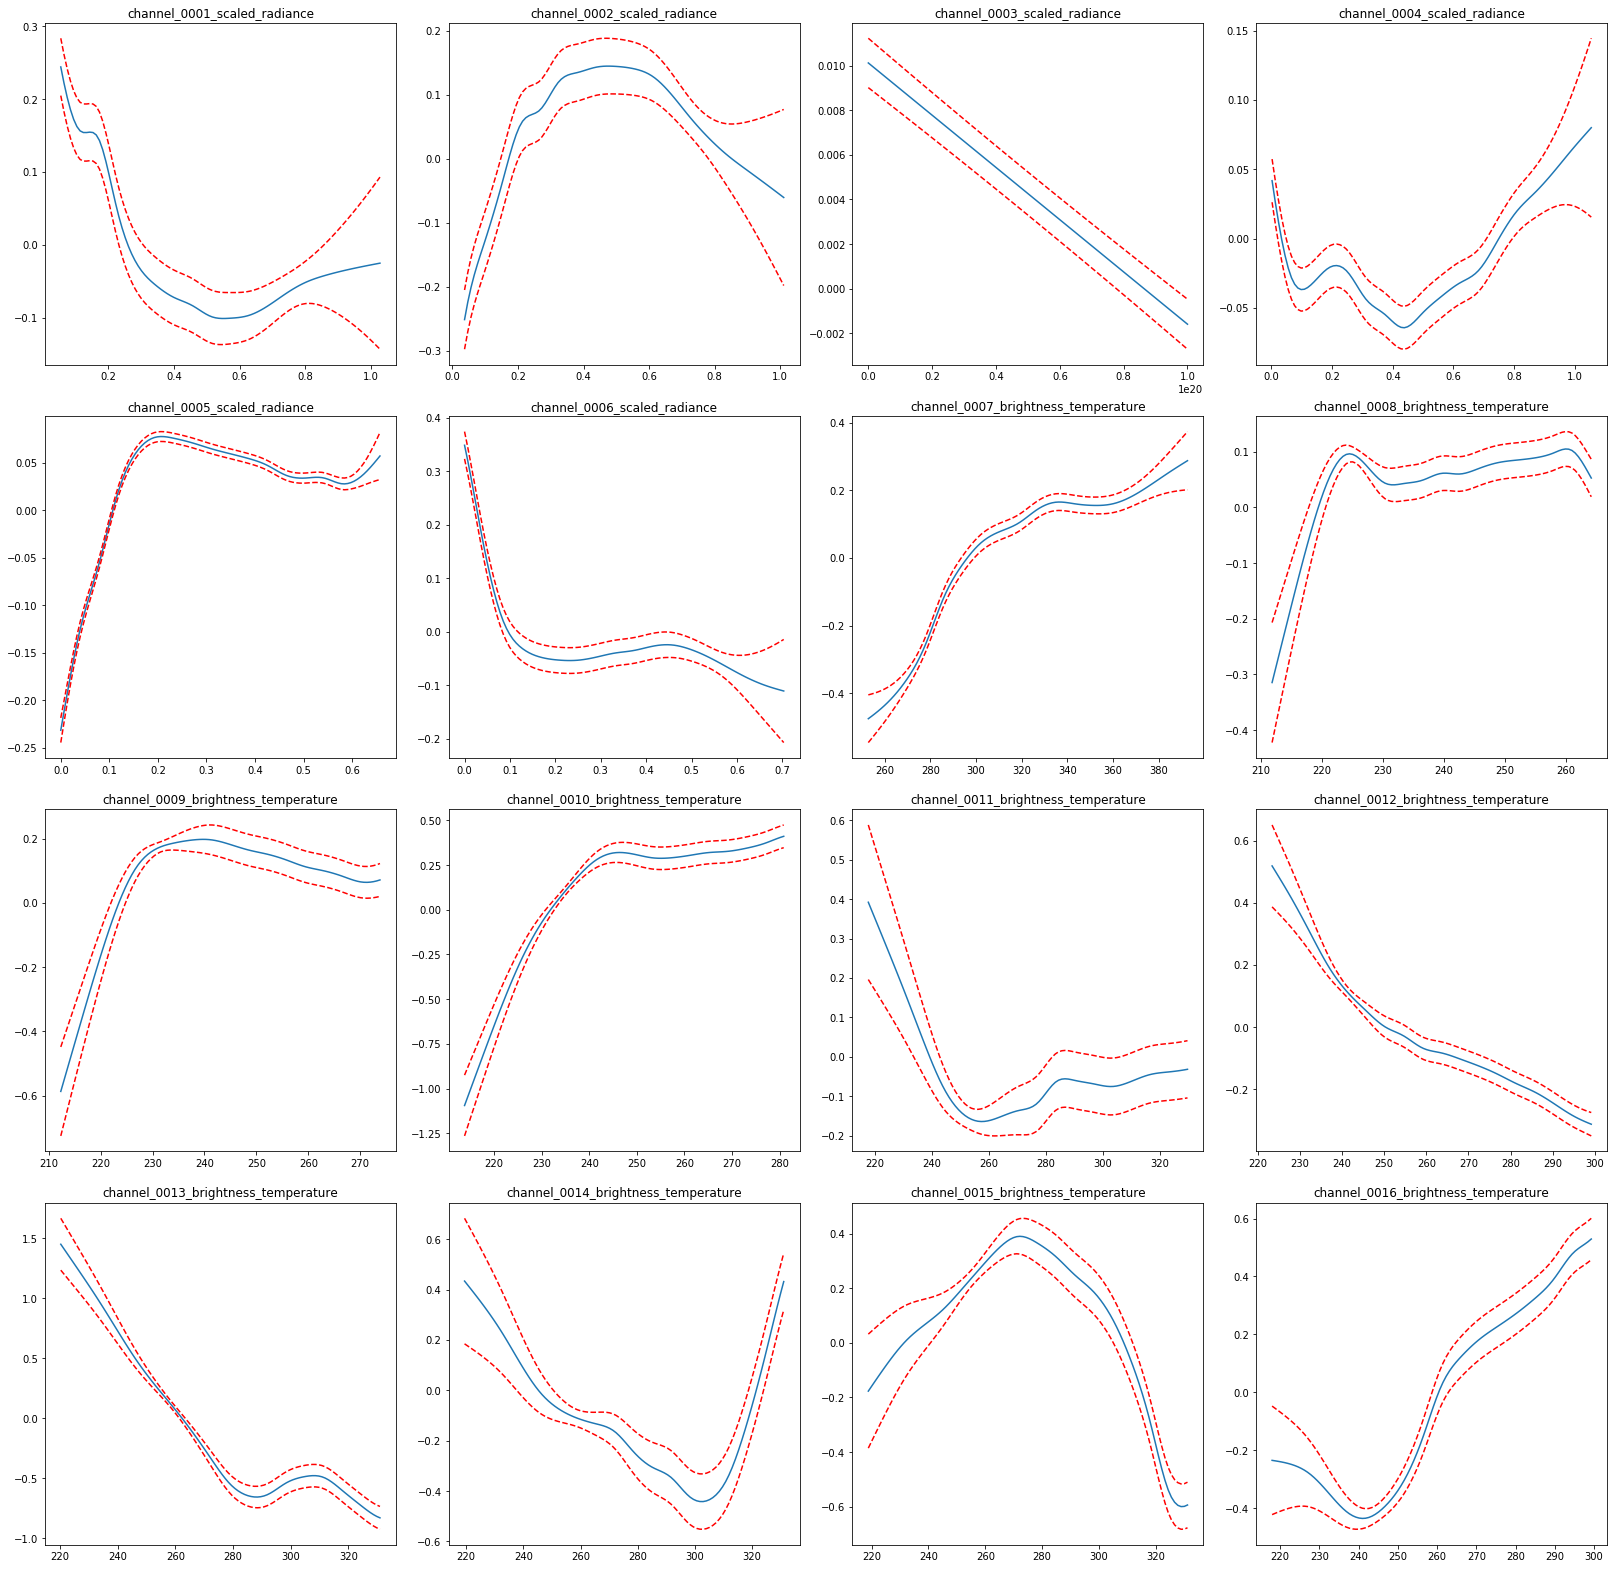


lambda_: 100


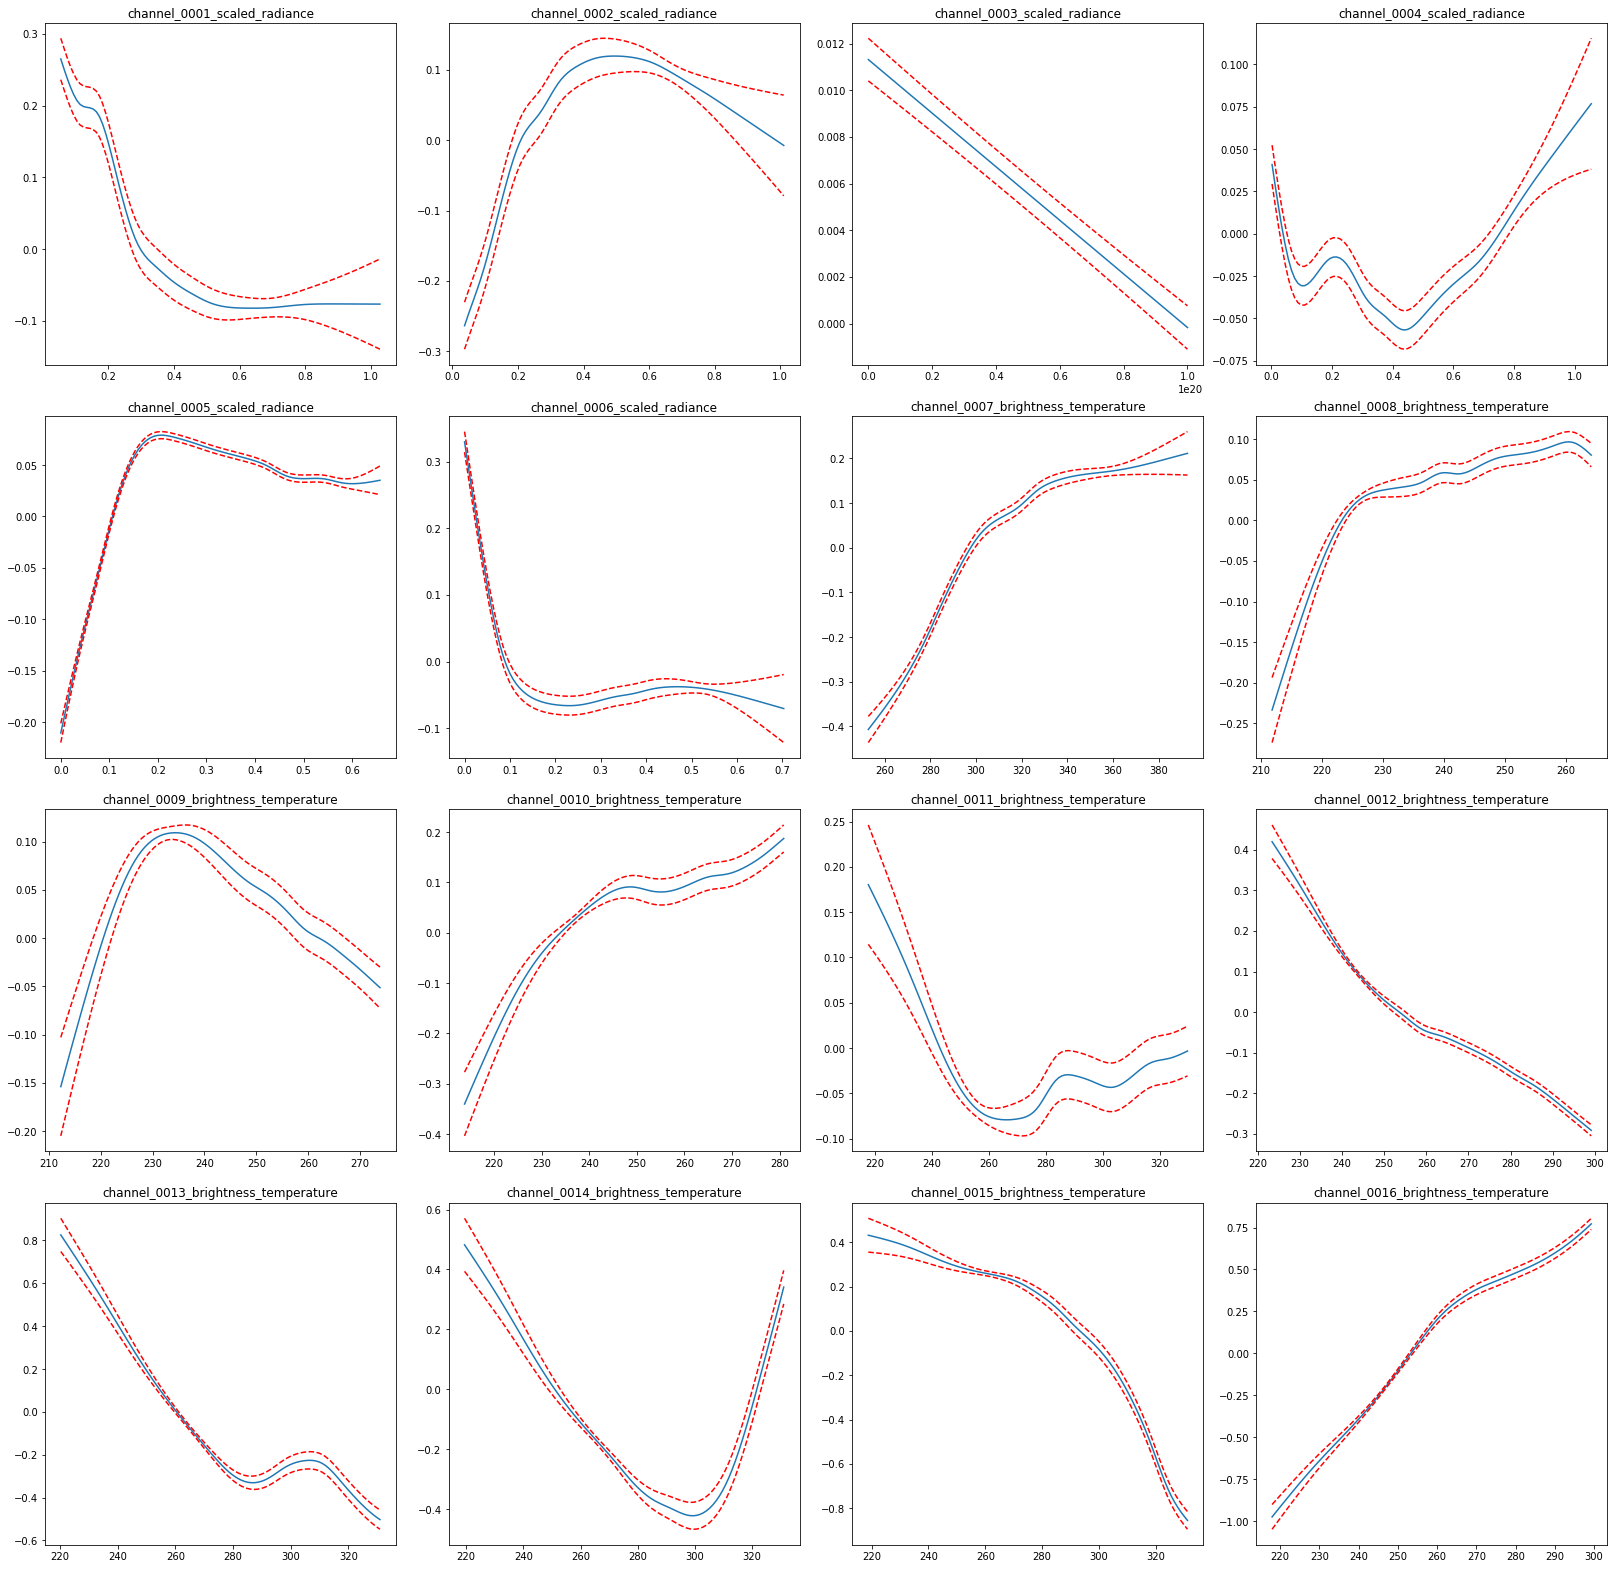

In [23]:
import matplotlib.pyplot as plt
lambda_list = [0.01, 0.1, 1, 10, 100]
for lambda_ in lambda_list:
    constraints = None
    gam_lam = LinearGAM(constraints=constraints, 
                    lam=lambda_).fit(X_train, y_train)
    print(f'\nlambda_: {lambda_}')
   
    
    fig = plt.figure(figsize=(28,28))
    titles = feature
    for i, term in enumerate(gam_lam.terms):
        if term.isintercept:
            continue

        XX = gam_lam.generate_X_grid(term=i)
        pdep, confi = gam_lam.partial_dependence(term=i, X=XX, width=0.95)

        ax = plt.subplot(4, 4, i+1)
        plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.15)
        ax.plot(XX[:, i], pdep)
        ax.plot(XX[:, i], confi, c='r', ls='--')
        ax.set_title(titles[i])
    plt.show()

## 2.2 test nsplines


lambda_: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


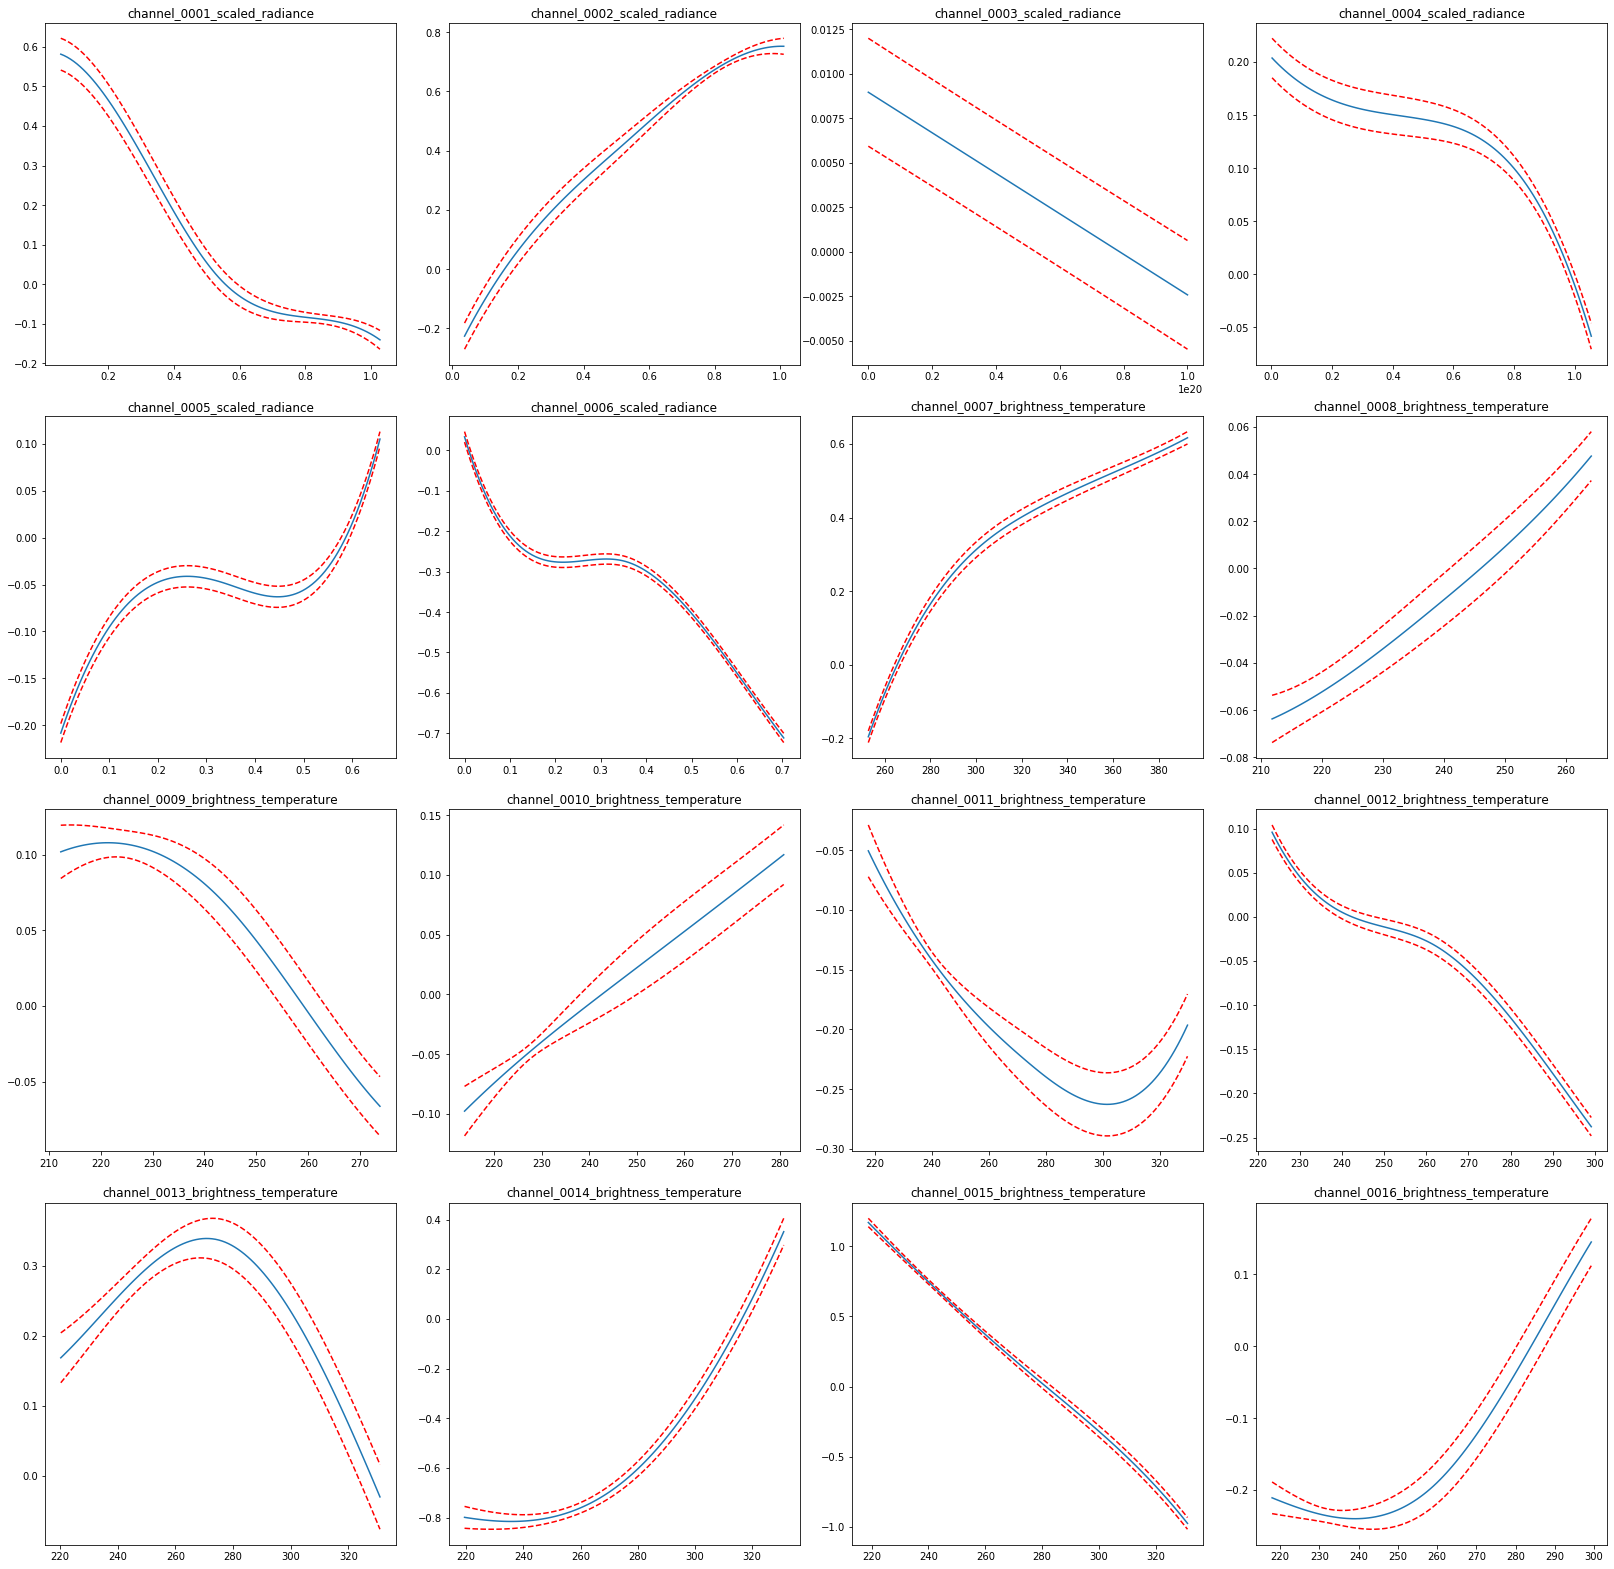


lambda_: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


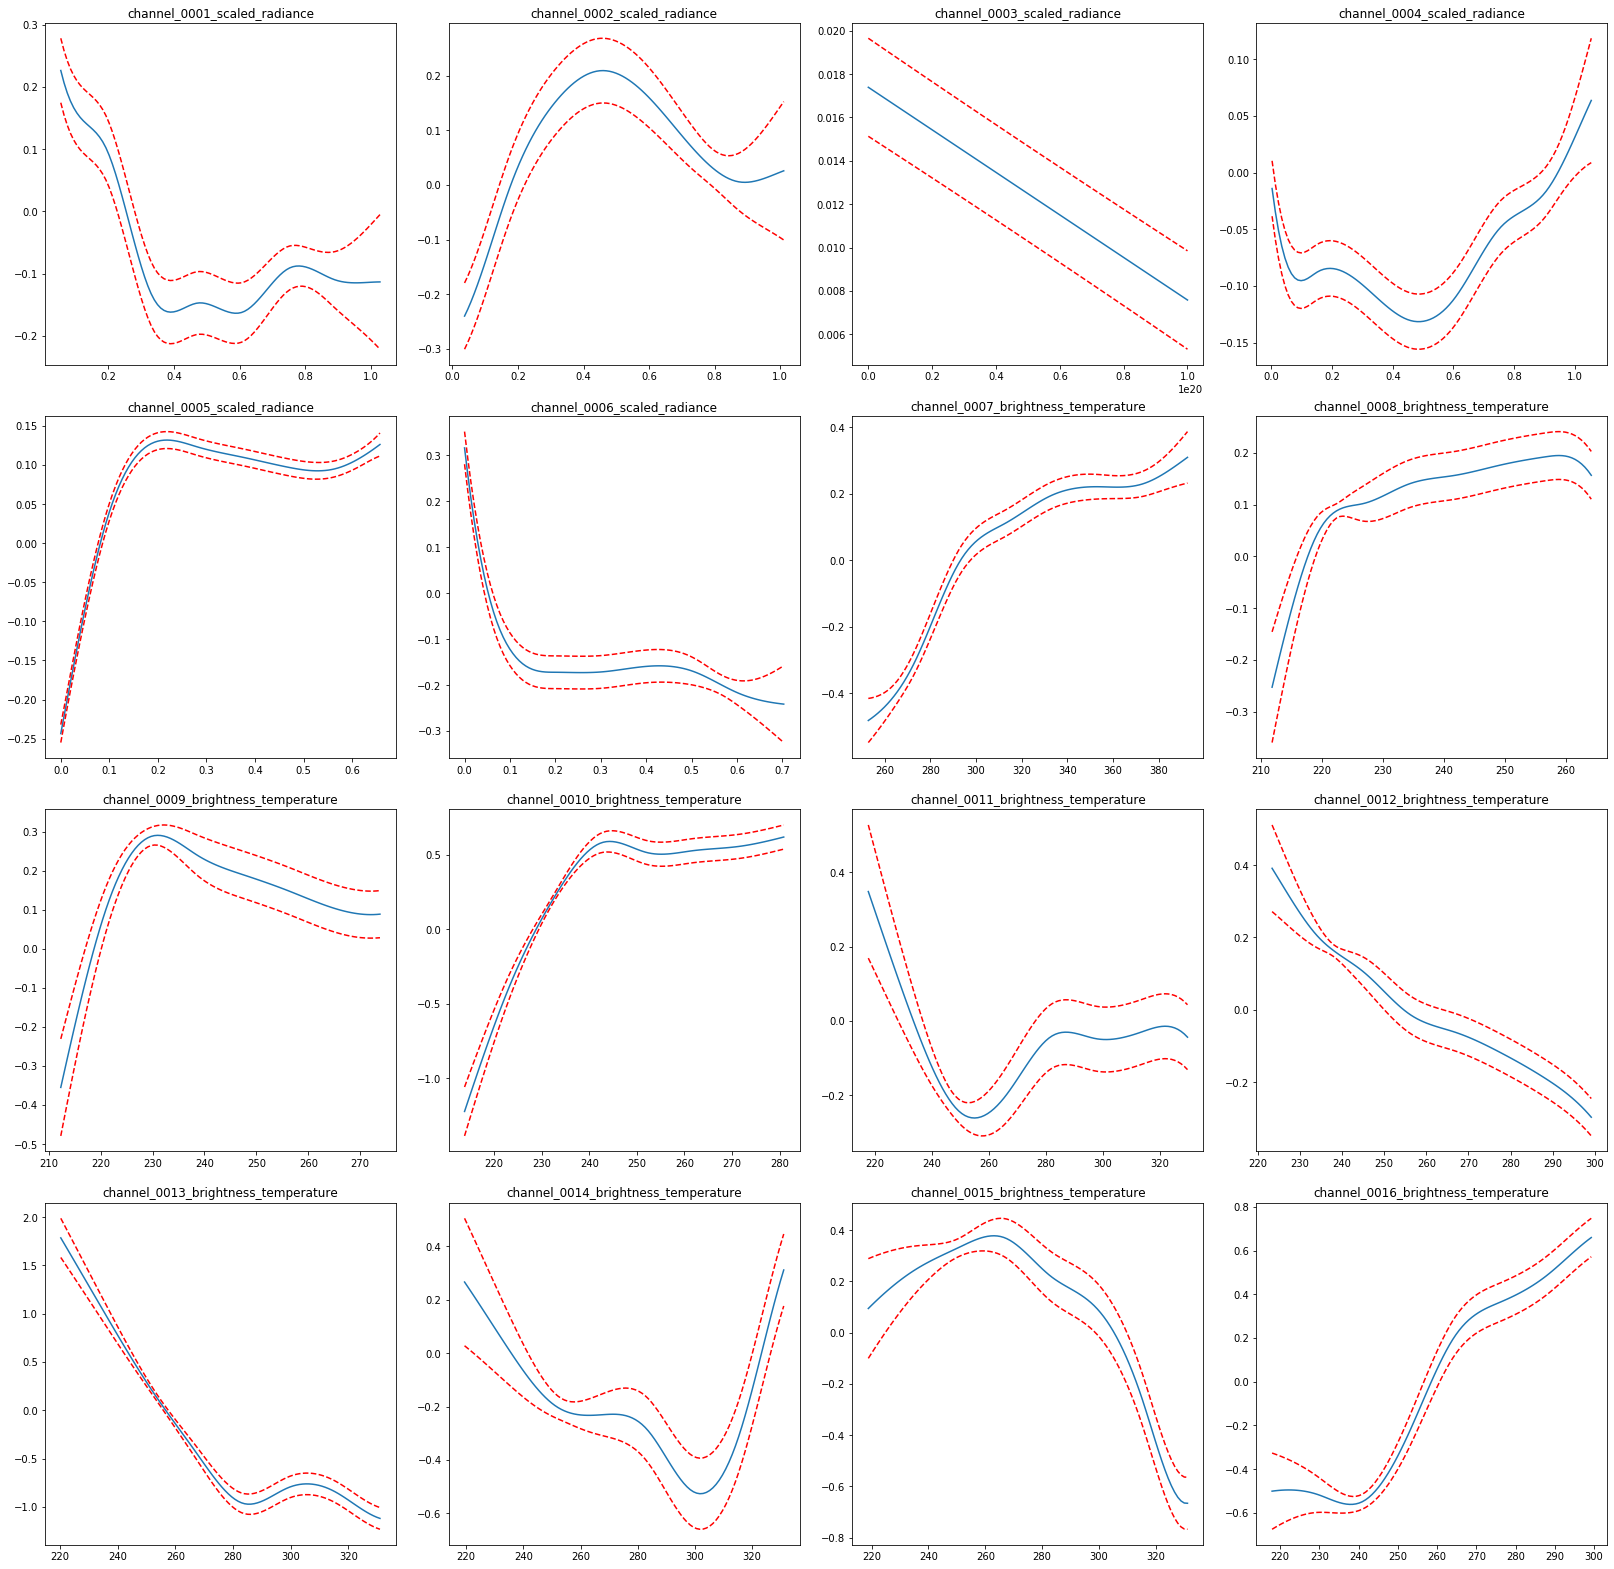

In [ ]:
n_splines_list = [[5]*16, [10]*16]
#for huge dataset like 36 days, spline = 100 cannot run 
#n_splines_list = [[5]*16, [10]*16, [100]*16]
for n_splines in n_splines_list:
    constraints = None
    gam_nsplines = LinearGAM(constraints = constraints, 
                    n_splines = n_splines).fit(X_train, y_train)
    print(f'\nlambda_: {n_splines}')
    
           
    fig = plt.figure(figsize=(28,28))
    titles = feature
    for i, term in enumerate(gam_nsplines.terms):
        if term.isintercept:
            continue

        XX = gam_nsplines.generate_X_grid(term=i)
        pdep, confi = gam_nsplines.partial_dependence(term=i, X=XX, width=0.95)

        ax = plt.subplot(4, 4, i+1)
        plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.15)
        ax.plot(XX[:, i], pdep)
        ax.plot(XX[:, i], confi, c='r', ls='--')
        ax.set_title(titles[i])
    plt.show()